# AIN 214 - PA2 - FALL 2023

BELOW MD CELLS CONTAIN THE QUESTIONS YOU ARE ASKED TO IMPLEMENT WITHIN THE CONTEXT OF THIS HW. PLEASE FILL IN THE CELLS FOR THE ANSWERS RIGHT BELOW THE MD CELL OF THE QUESTION. YOU CAN ADD AS MANY CELLS AS YOU WANT, BE IT CODE OR MD, SO LONG AS YOU PROVIDE AN UNDERSTANDABLE AND TRACBLE REPORTING. PLEASE ADD COMMENTS ON YOUR CODES. ALSO, FILL IN MD CELLS WHERE YOU ARE ASKED YO COMMENT ON YOUR RESULTS OR EPXLAIN YOUR REASONING. ALSO, PLEASE DO NO HESITATE TO USE THEM FOR YOUR OWN REPORTING PURPOSES. PLEASE KEEP IN MIND THAT REPORTING IS A KEY STEP IN DATA SCIENCE.

Deadline: 17.11.2023 (23:59:59)

Submission: Submit your Jupyter Notebooks via https://submit.cs.hacettepe.edu.tr/

# THE STUDENT INFO
# Student Name:
# Student ID:

In [2]:
# imports
import numpy as np
import pandas as pd
from sqlite3 import connect
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

# 1st SET OF QUESTIONS: Skyward Travel Agency Data Management Project

Skyward is a premier travel agency aiming to provide seamless experiences for its clients. As business is booming, the agency has a myriad of data points to keep track of, and they need an efficient way to manage it all. Here's what they're dealing with:

- **Clients' Database**: Skyward has a growing list of clients. For each client, they maintain records of their full name, contact email, and phone number. Every client is assigned a unique client ID for efficient tracking and personalized service.

- **Airline Partnerships**: Skyward has collaborations with several airline companies, each identified by a unique airline ID. Beyond just names, they have comprehensive details of all the flights offered by these airline companies. This flight data includes flight numbers, associated airline IDs, departure cities, destinations, and dates of operation.

- **Hotel Affiliations**: Skyward's clients need places to stay, leading to collaborations with multiple hotels. Each hotel is cataloged with a unique ID, alongside its name, geographical location, and a client feedback rating ranging from 1 to 5.

- **Travel Bookings**: Skyward's primary service involves facilitating travel bookings. Every booking, be it for a flight or hotel, gets recorded. Flight bookings include the specific flight number, the client's ID making the booking, and the booking date. Hotel bookings aren't any different with records of the hotel ID, the client's ID, and the duration of stay (check-in and check-out dates).

- **Feedback Mechanism**: Feedback drives Skyward's quality assurance. Clients are encouraged to leave reviews post their trips. For airlines, each review captures the client's ID, the reviewed airline's ID, and the feedback text. Hotel feedback mirrors this, substituting airlines for hotels.

**Data Provision:**
You are provided with unnormalized `feedback_details_df` and `bookings_df` datasets in the form of CSV files.

**Your Task**:

You should design your own DB schema meeting the above-stated constraints. There are multiple ways to design your tables; you only need to ensure that the design fits the outlined requirements. Begin by clearly defining your schema as tables. Once the schema is established, you will tackle a set of SQL tasks that will be provided separately. The SQL tasks will involve writing queries to extract, modify, or add data based on the designed schema. Good luck! 

**Note: Use sqite3 python package for DB**


## Q1. Design your schema as tables. Draw the necessary tables with the appropriate attributes. State the primary keys, foreign keys (and their references). Create the tables in your schema in the database. (10 Points)

There is no single soluion here, come up with your own design.



### Table 1: Clients:

| Column        | Type    | Key          | Description        |
|---------------|---------|--------------|--------------------|
| CustomerID    | TEXT    | PRIMARY KEY  | Customers ID       |
| CustomerName  | TEXT    |              | Customers Name     |
| CustomerEmail | TEXT    |              | Customers Email    |
| CustomerPhone | TEXT    |              | Customers Phone    |


### Table 2: AirlinePartnerships:

| Column            | Type    | Key          | Description          |
|-------------------|---------|--------------|----------------------|
| AirlineID         | TEXT    | PRIMARY KEY  | Airline ID           |
| AirlineName       | TEXT    |              | Airline Name         |
| FlightID          | TEXT    |              | Flight ID            |
| Flight_Departure  | TEXT    |              | Flight Departure     |
| Flight_Destination| TEXT    |              | Flight Destination   |
| Flight_Date       | TEXT    |              | Flight Date          |


### Table 3: HotelAffiliations:

| Column         | Type    | Key          | Description       |
|----------------|---------|--------------|-------------------|
| HotelID        | TEXT    | PRIMARY KEY  | Hotel ID          |
| HotelName      | TEXT    |              | Hotel Name        |
| HotelLocation  | TEXT    |              | Hotel Location    |
| HotelRating    | TEXT    |              | Hotel Rating      |


### Table 4: FlightBookings:

| Column      | Type    | Key          | Description       |
|-------------|---------|--------------|-------------------|
| BookingID   | TEXT    | PRIMARY KEY  | Booking ID        |
| FlightID    | TEXT    | FOREIGN KEY  | Flight ID         |
| CustomerID  | TEXT    | FOREIGN KEY  | Customer ID       |
| Flight_Date | TEXT    |              | Flight Date       |
|             |         | FOREIGN KEY  | References AirlinePartnerships(FlightID) |
|             |         | FOREIGN KEY  | References Clients(CustomerID)           |


### Table 5: HotelBookings:

| Column      | Type    | Key          | Description      |
|-------------|---------|--------------|------------------|
| BookingID   | TEXT    | PRIMARY KEY  | Booking ID       |
| HotelID     | TEXT    | FOREIGN KEY  | Hotel ID         |
| CustomerID  | TEXT    | FOREIGN KEY  | Customer ID      |
|             |         | FOREIGN KEY  | References HotelAffiliations(HotelID)   |
|             |         | FOREIGN KEY  | References Clients(CustomerID)          |


### Table 6: FlightFeedbacks:

| Column      | Type    | Key          | Description       |
|-------------|---------|--------------|-------------------|
| FeedbackID  | TEXT    | PRIMARY KEY  | Feedback ID       |
| FlightID    | TEXT    | FOREIGN KEY  | Flight ID         |
| CustomerID  | TEXT    | FOREIGN KEY  | Customer ID       |
| Review      | TEXT    |              | Review            |
|             |         | FOREIGN KEY  | References AirlinePartnerships(FlightID) |
|             |         | FOREIGN KEY  | References Clients(CustomerID)           |


### Table 7: HotelFeedbacks:

| Column      | Type    | Key          | Description      |
|-------------|---------|--------------|------------------|
| FeedbackID  | TEXT    | PRIMARY KEY  | Feedback ID      |
| HotelID     | TEXT    | FOREIGN KEY  | Hotel ID         |
| CustomerID  | TEXT    | FOREIGN KEY  | Customer ID      |
| Review      | TEXT    |              | Review           |
|             |         | FOREIGN KEY  | References HotelAffiliations(HotelID)   |
|             |         | FOREIGN KEY  | References Clients(CustomerID)          |

In [4]:
connection = sqlite3.connect('BookingDetails.db')
cursor = connection.cursor()

df = pd.read_csv("BookingDetails.csv")
df1 = pd.read_csv("FeedbackDetails.csv")

##I noticed some duplicate and null value rows in the tables so I handled them here.
clients=df[['CustomerID','CustomerName','CustomerEmail','CustomerPhone']]
clients=clients.drop_duplicates()


airlines = df[['AirlineID', 'AirlineName', 'FlightID', 'Flight_Departure', 'Flight_Destination', 'Flight_Date']]
airlines = airlines.dropna()

hotels=df[['HotelID','HotelName','HotelLocation','HotelRating']]
hotels=hotels.dropna()

flight_booking=df[['BookingID','FlightID','CustomerID','Flight_Date']]
flight_booking = flight_booking.dropna()

hotel_booking=df[['BookingID','HotelID','CustomerID']]
hotel_booking=hotel_booking.dropna()

flight_feedback=df1[['FeedbackID','CustomerID','AirlineID','Review']]
flight_feedback=flight_feedback.dropna()

hotel_feedback=df1[['FeedbackID','CustomerID','HotelID','Review']]
hotel_feedback=hotel_feedback.dropna()

cursor.execute('''
    CREATE TABLE IF NOT EXISTS Clients (
        CustomerID TEXT PRIMARY KEY,
        CustomerName TEXT,
        CustomerEmail TEXT,
        CustomerPhone TEXT
    )
''')
cursor.execute('''
    CREATE TABLE IF NOT EXISTS AirlinePartnerships (
        AirlineID TEXT PRIMARY KEY,
        AirlineName TEXT,
        FlightID TEXT,
        Flight_Departure TEXT,
        Flight_Destination TEXT,
        Flight_Date TEXT
    )
''')
cursor.execute('''
    CREATE TABLE IF NOT EXISTS HotelAffiliations (
        HotelID TEXT PRIMARY KEY,
        HotelName TEXT,
        HotelLocation TEXT,
        HotelRating TEXT
    )
''')
cursor.execute('''
    CREATE TABLE IF NOT EXISTS FlightBookings (
        BookingID TEXT PRIMARY KEY,
        FlightID TEXT,
        CustomerID TEXT,
        Flight_Date TEXT,
        FOREIGN KEY (FlightID) REFERENCES AirlinePartnerships(FlightID),
        FOREIGN KEY (CustomerID) REFERENCES Clients(CustomerID)
    )
''')
cursor.execute('''
    CREATE TABLE IF NOT EXISTS HotelBookings (
        BookingID TEXT PRIMARY KEY,
        HotelID TEXT,
        CustomerID TEXT,
        FOREIGN KEY (HotelID) REFERENCES HotelAffiliations(HotelID),
        FOREIGN KEY (CustomerID) REFERENCES Clients(CustomerID)
    )
''')
cursor.execute('''
    CREATE TABLE IF NOT EXISTS FlightFeedbacks (
        FeedbackID TEXT PRIMARY KEY,
        FlightID TEXT,
        CustomerID TEXT,
        Review TEXT,
        FOREIGN KEY (FlightID) REFERENCES AirlinePartnerships(FlightID),
        FOREIGN KEY (CustomerID) REFERENCES Clients(CustomerID)
    )
''')
cursor.execute('''
    CREATE TABLE IF NOT EXISTS HotelFeedbacks (
        FeedbackID TEXT PRIMARY KEY,
        HotelID TEXT,
        CustomerID TEXT,
        Review TEXT,
        FOREIGN KEY (HotelID) REFERENCES HotelAffiliations(HotelID),
        FOREIGN KEY (CustomerID) REFERENCES Clients(CustomerID)
    )
''')

clients.to_sql('Clients', connection, if_exists='replace', index=False)
airlines.to_sql('AirlinePartnerships', connection, if_exists='replace', index=False)
hotels.to_sql('HotelAffiliations', connection, if_exists='replace', index=False)
flight_booking.to_sql('FlightBookings', connection, if_exists='replace', index=False)
hotel_booking.to_sql('HotelBookings', connection, if_exists='replace', index=False)
flight_feedback.to_sql('FlightFeedbacks', connection, if_exists='replace', index=False)
hotel_feedback.to_sql('HotelFeedbacks', connection, if_exists='replace', index=False)

connection.commit()
print("Clients Table")
display(pd.read_sql('''
SELECT *
FROM Clients
''', connection))
print("AirlinePartnerShips Table")
display(pd.read_sql('''
SELECT *
FROM AirlinePartnerShips
''', connection))
print("HotelAffiliations Table")
display(pd.read_sql('''
SELECT *
FROM HotelAffiliations
''', connection))
print("FlightBookings Table")
display(pd.read_sql('''
SELECT *
FROM FlightBookings
''', connection))
print("Hotel Bookings Table")
display(pd.read_sql('''
SELECT *
FROM HotelBookings
''', connection))
print("FlightFeedbacks Table")
display(pd.read_sql('''
SELECT *
FROM FlightFeedbacks
''', connection))
print("HotelFeedbacks Table")
display(pd.read_sql('''
SELECT *
FROM HotelFeedbacks
''', connection))

Clients Table


,CustomerID,CustomerName,CustomerEmail,CustomerPhone
0,6145,Ethan Smith,ethan.smith@mail.com,555-0665405
1,6148,Ethan Martinez,ethan.martinez@mail.com,555-3339628
2,4106,Ethan Rodriguez,ethan.rodriguez@mail.com,555-3077795
3,6156,Mia Rodriguez,mia.rodriguez@mail.com,555-6360055
4,4110,Ethan Martinez,ethan.martinez@mail.com,555-5293267
...,...,...,...,...
495,2016,Ethan Davis,ethan.davis@mail.com,555-4347686
496,4065,Mia Williams,mia.williams@mail.com,555-3213981
497,6117,Logan Martinez,logan.martinez@mail.com,555-6781352
498,6134,Ethan Rodriguez,ethan.rodriguez@mail.com,555-7428799


AirlinePartnerShips Table


,AirlineID,AirlineName,FlightID,Flight_Departure,Flight_Destination,Flight_Date
0,8533.0,AirZoom,8513.0,Hong Kong,Barcelona,2024-10-07 16:33:28.557244
1,8533.0,AirZoom,4951.0,Barcelona,Paris,2024-05-31 16:33:28.557253
2,8863.0,AirWave,8673.0,Istanbul,Dubai,2024-07-19 16:33:28.557320
3,2218.0,JetStream,2794.0,Kuala Lumpur,London,2023-12-29 16:33:28.557202
4,6418.0,SkyPace,8338.0,Istanbul,Barcelona,2024-03-03 16:33:28.557169
...,...,...,...,...,...,...
503,2974.0,SkyLink,7498.0,Singapore,Tokyo,2024-04-30 16:33:28.557246
504,9097.0,AirNest,8290.0,Hong Kong,Dubai,2024-03-05 16:33:28.557151
505,9097.0,AirNest,8290.0,Hong Kong,Dubai,2024-03-05 16:33:28.557151
506,5415.0,SkyWings,7243.0,Hong Kong,London,2024-08-17 16:33:28.557143


HotelAffiliations Table


,HotelID,HotelName,HotelLocation,HotelRating
0,1647.0,Silver Villa,Location_42,5.0
1,6921.0,Ruby Plaza,Location_4,5.0
2,1919.0,Emerald Motel,Location_50,4.0
3,7428.0,Crystal Motel,Location_3,4.0
4,5095.0,Sapphire Hideaway,Location_39,5.0
...,...,...,...,...
483,4857.0,Diamond Inn,Location_47,2.0
484,7428.0,Crystal Motel,Location_3,4.0
485,8577.0,Emerald Palace,Location_1,4.0
486,5769.0,Golden Resort,Location_5,1.0


FlightBookings Table


,BookingID,FlightID,CustomerID,Flight_Date
0,1,8513.0,6145,2024-10-07 16:33:28.557244
1,3,4951.0,6145,2024-05-31 16:33:28.557253
2,7,8673.0,4106,2024-07-19 16:33:28.557320
3,9,2794.0,4106,2023-12-29 16:33:28.557202
4,15,8338.0,2064,2024-03-03 16:33:28.557169
...,...,...,...,...
503,985,7498.0,2016,2024-04-30 16:33:28.557246
504,990,8290.0,6117,2024-03-05 16:33:28.557151
505,993,8290.0,6134,2024-03-05 16:33:28.557151
506,994,7243.0,6134,2024-08-17 16:33:28.557143


Hotel Bookings Table


,BookingID,HotelID,CustomerID
0,2,1647.0,6145
1,4,6921.0,6148
2,5,1919.0,6148
3,6,7428.0,6148
4,8,5095.0,4106
...,...,...,...
483,988,4857.0,4065
484,989,7428.0,6117
485,991,8577.0,6117
486,992,5769.0,6134


FlightFeedbacks Table


,FeedbackID,CustomerID,AirlineID,Review
0,3073,7498,6418.0,Horrible experience with the seat.
1,6658,6744,6418.0,The cabin cleanliness was impressive.
2,6149,8207,3233.0,Decent experience with the cabin cleanliness.
3,8198,9382,6418.0,I found the in-flight entertainment to be aver...
4,8710,3067,2218.0,The crew was average.
...,...,...,...,...
295,5621,8966,4815.0,Really enjoyed the great crew.
296,8694,6094,3233.0,Decent experience with the cabin cleanliness.
297,1527,5679,9097.0,The legroom was average.
298,4604,4659,5415.0,Terrible experience with the crew.


HotelFeedbacks Table


,FeedbackID,CustomerID,HotelID,Review
0,2050,4317,3378.0,Really enjoyed the terrible gym.
1,7171,6383,4340.0,Really enjoyed the decent view.
2,9221,8379,6234.0,Really enjoyed the excellent pool.
3,2566,8651,7742.0,Really enjoyed the horrible gym.
4,9736,4196,4927.0,Poor experience with the lobby.
...,...,...,...,...
295,8182,4009,4147.0,Impressive experience with the room.
296,2041,7934,4656.0,Fantastic experience with the service.
297,6650,2310,2525.0,The pool was excellent.
298,7164,7798,5994.0,The service was average.


## Q2. Find the total number of bookings made for each hotel. Display the hotel name and the corresponding number of bookings. (10 Points)

In [5]:
query = '''
SELECT h.HotelName ,COUNT( DISTINCT b.BookingID) as NumberofBookings
FROM HotelBookings b, HotelAffiliations h
WHERE b.HotelID = h.HotelID
GROUP BY b.HotelID;
'''
#I grouped the table by HotelID because there were some same Hotel's with the same name but different ID
cursor.execute(query)
results = cursor.fetchall()
results_df=pd.DataFrame(results,columns=['Hotel','Total Bookings'])
display(results_df)

,Hotel,Total Bookings
0,Opal Motel,11
1,Diamond Plaza,6
2,Golden Suites,16
3,Silver Villa,10
4,Emerald Motel,15
5,Sapphire Villa,14
6,Jade Motel,5
7,Jade Suites,7
8,Pearl Resort,12
9,Emerald Resort,9


## Q3. Retrieve the name and contact details of clients who have provided feedback for both flights and hotels. Ensure there are no duplicate entries in your result. (10 Points)


In [4]:
query = '''
SELECT
    DISTINCT C.CustomerID,C.CustomerName,C.CustomerEmail,C.CustomerPhone
FROM Clients C
JOIN (
    SELECT CustomerID
    FROM FlightFeedbacks
    GROUP BY CustomerID
    HAVING COUNT(DISTINCT AirlineID) > 0
) FF ON C.CustomerID = FF.CustomerID
JOIN (
    SELECT CustomerID
    FROM HotelFeedbacks
    GROUP BY CustomerID
    HAVING COUNT(DISTINCT HotelID) > 0
) HF ON C.CustomerID = HF.CustomerID;

'''
cursor.execute(query)
results=cursor.fetchall()
results_df=pd.DataFrame(results,columns=['CustomerID','CustomerName','CustomerEmail','CustomerPhone'])
display(results_df)

,CustomerID,CustomerName,CustomerEmail,CustomerPhone
0,1045,Mason Jones,mason.jones@mail.com,555-0497376
1,1085,Olivia Miller,olivia.miller@mail.com,555-8743718
2,1094,Mason Martinez,mason.martinez@mail.com,555-4087377
3,1229,Emma Miller,emma.miller@mail.com,555-9672748
4,1241,Olivia Garcia,olivia.garcia@mail.com,555-0514945
...,...,...,...,...
104,9527,Ethan Davis,ethan.davis@mail.com,555-0282897
105,9642,John Smith,john.smith@mail.com,555-4394283
106,9698,Mia Williams,mia.williams@mail.com,555-6569856
107,9764,Logan Williams,logan.williams@mail.com,555-2061905


## Q4. Identify hotels that have a feedback rating lower than the average feedback rating across all hotels. List their names and ratings. (10 Points)


In [6]:
query = '''
SELECT HotelName, HotelRating
FROM HotelAffiliations 
WHERE HotelRating < (
    SELECT AVG(HotelRating) 
    FROM HotelAffiliations
)
GROUP BY HotelID;
'''
#Again, I grouped the table by HotelID because there were some same Hotel's with the same name but different ID
cursor.execute(query)
results=cursor.fetchall()
results_df=pd.DataFrame(results,columns=['HotelName','HotelRating'])
display(results_df)
display(pd.read_sql('''
SELECT AVG(HotelRating)
FROM HotelAffiliations
''',connection))


,HotelName,HotelRating
0,Opal Motel,2.0
1,Diamond Plaza,2.0
2,Sapphire Villa,2.0
3,Jade Motel,2.0
4,Pearl Resort,2.0
5,Emerald Resort,3.0
6,Golden Inn,3.0
7,Jade Resort,2.0
8,Silver Palace,2.0
9,Pearl Hideaway,1.0


,AVG(HotelRating)
0,3.358607


## Q5. Find clients who have stayed in at least three different hotels and flown with at least two different airlines. Display their names and total number of bookings. (10 Points)


In [23]:
query ='''
SELECT C.CustomerID,C.CustomerName,
    COUNT(DISTINCT HB.HotelID) AS NumberOfUniqueHotels,
    COUNT(DISTINCT FB.FlightID) AS NumberOfUniqueAirlines,
    COUNT(DISTINCT B.BookingID) AS TotalBookings
FROM Clients C
JOIN HotelBookings HB ON C.CustomerID = HB.CustomerID
JOIN FlightBookings FB ON C.CustomerID = FB.CustomerID
JOIN
    (
    SELECT CustomerID, BookingID
    FROM HotelBookings
    UNION ALL
    SELECT CustomerID, BookingID
    FROM FlightBookings
    ) B ON C.CustomerID = B.CustomerID
GROUP BY C.CustomerID, C.CustomerName
HAVING NumberOfUniqueHotels >= 3 AND NumberOfUniqueAirlines >= 2;
'''
cursor.execute(query)
results=cursor.fetchall()
results_df=pd.DataFrame(results,columns=['CustomerID','CustomerName','StayedHotels','FlownAirlines','Bookings'])
display(results_df)

,CustomerID,CustomerName,StayedHotels,FlownAirlines,Bookings


## Q6 - **Bonus/Challenge**: Do the same in Q3 without using the keywords: "HAVING" and "GROUP BY". Make a comparison on the two processes (one using the aggregate operators and this) 

### This one is inneficent compared to Q3.

In [7]:
query = '''
SELECT DISTINCT C.CustomerID,C.CustomerName, C.CustomerEmail, C.CustomerPhone
FROM Clients C
WHERE EXISTS (
    SELECT 1
    FROM FlightFeedbacks FF
    WHERE C.CustomerID = FF.CustomerID
) AND EXISTS (
    SELECT 1
    FROM HotelFeedbacks HF
    WHERE C.CustomerID = HF.CustomerID
);
'''
cursor.execute(query)
results=cursor.fetchall()
results_df=pd.DataFrame(results,columns=['CustomerID','CustomerName','CustomerEmail','CustomerPhone'])
display(results_df)

,CustomerID,CustomerName,CustomerEmail,CustomerPhone
0,6148,Ethan Martinez,ethan.martinez@mail.com,555-3339628
1,4149,Sophia Davis,sophia.davis@mail.com,555-7585879
2,8247,Liam Miller,liam.miller@mail.com,555-3750839
3,8292,Mason Brown,mason.brown@mail.com,555-4291570
4,6260,Ethan Smith,ethan.smith@mail.com,555-4014268
...,...,...,...,...
104,1898,Logan Martinez,logan.martinez@mail.com,555-6346303
105,6003,Liam Brown,liam.brown@mail.com,555-5183574
106,1933,Ethan Rodriguez,ethan.rodriguez@mail.com,555-5432713
107,8096,Olivia Davis,olivia.davis@mail.com,555-6970002


# 2nd SET OF QUESTIONS: DATA ANALYSIS WITH VISUALIZATION TOOLS

In the 2nd part of this hw, you are to deal with the famous dataset of Titanic [1]. Answer the following questions, using visualization tools, and comment on your work.

## Q1. Read the Titanic dataset into a DataFrame. Using a pivot table, analyze the survival rate by gender and class.


In [8]:
titanic_df = pd.read_csv("titanic.csv")
pivot_table = pd.pivot_table(titanic_df, values='Survived', index='Sex', columns='Pclass', aggfunc='mean')
pivot_table

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


### We can clearly say that females have a higher survival rate compared to man. Although it seems Pclass and survival rate has a positive correlation it does not follow a spesific pattern. But I guess higher class passenger might have accsessed the survival resources more easily.

## Q2. Create a histogram showcasing the age distribution of passengers. Overlay this with a KDE plot. Comment on the most common age group aboard the Titanic.


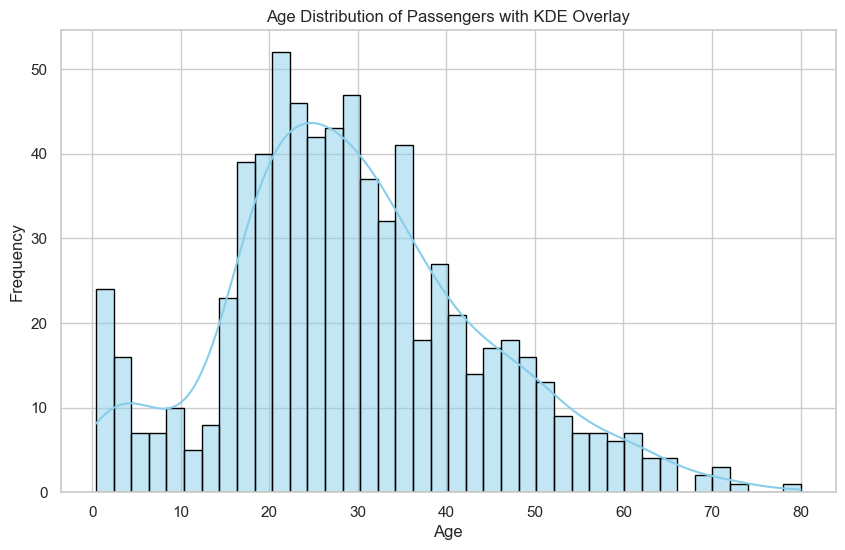

In [16]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
sns.histplot(titanic_df['Age'], bins=40, kde=True, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution of Passengers with KDE Overlay')
plt.show()

### The most common age group is between 18 and 30. The most common age is 22. The frequency of babies and toddlers caught my attention. It seems considerably high.

## Q3. Using a pie chart, illustrate the embarkation points for Titanic passengers. Identify the port with the highest boarding. Analyze the age and sex distribution from this port. Does this distribution reflect the "women and children first" evacuation policy?

The port with the highest boarding is: S


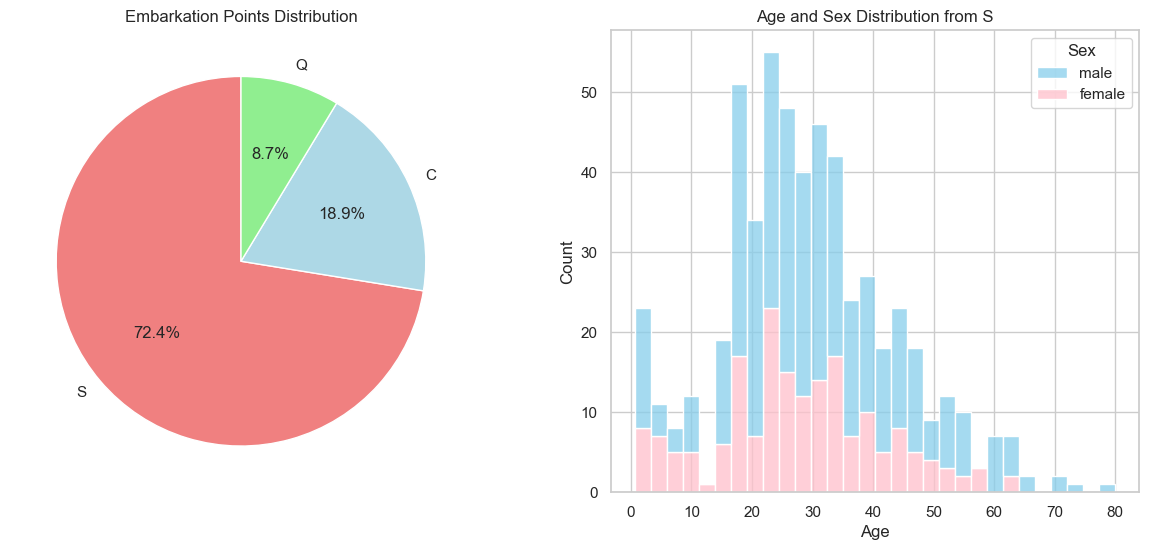

In [24]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 6))
embarkation_counts = titanic_df['Embarked'].value_counts()
plt.subplot(1, 2, 1)
plt.pie(embarkation_counts, labels=embarkation_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightblue', 'lightgreen'])
plt.title('Embarkation Points Distribution')
highest_boarding_port = embarkation_counts.idxmax()
print(f"The port with the highest boarding is: {highest_boarding_port}")
plt.subplot(1, 2, 2)
sns.histplot(data=titanic_df[titanic_df['Embarked'] == highest_boarding_port], x='Age', hue='Sex', bins=40, multiple='stack', palette=['skyblue', 'pink'])
plt.title(f'Age and Sex Distribution from {highest_boarding_port}')
plt.show()


### The Southampton port has the highest boarding. It seems overall more males have embarked. But I could not come up with a correlation between these observations and "women and children first" evacuation policy.

## Q4. Create a scatter plot comparing age and fare. Comment on any correlations or patterns you observe.

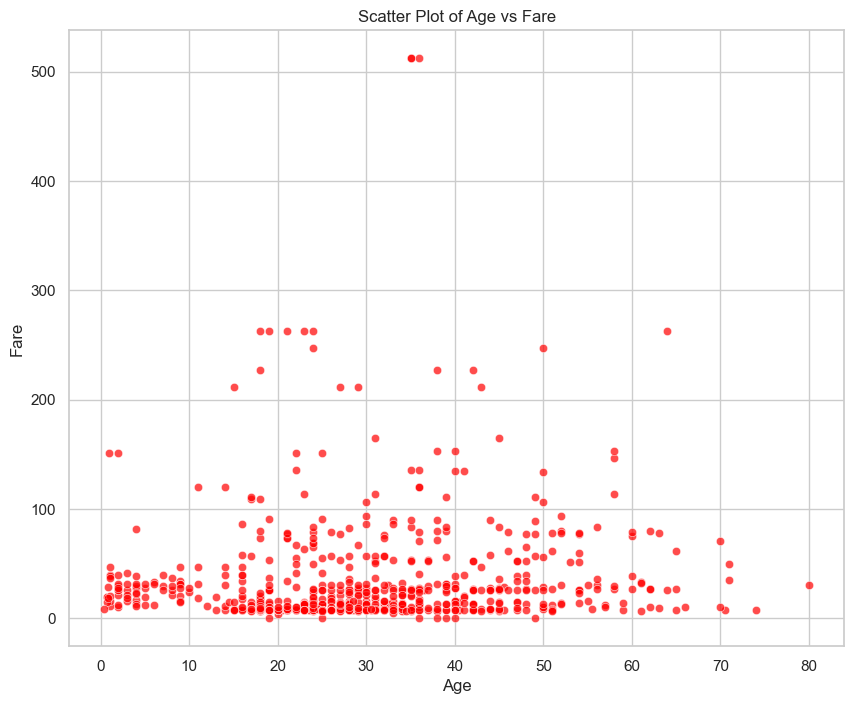

In [11]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Age', y='Fare', data=titanic_df, alpha=0.7, color='red')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Scatter Plot of Age vs Fare')
plt.show()

### There is no clear linear distribution, and age does not have a clear effect on the fare either. However, there are 2 outliers between ages 30 and 40 who paid 500 for fare. It seems interesting.

## Q5. Group the dataset by 'Embarked' and 'Pclass' and visualize the mean fare for each combination using a bar chart. Comment on the fare differences based on embarkation ports and classes.


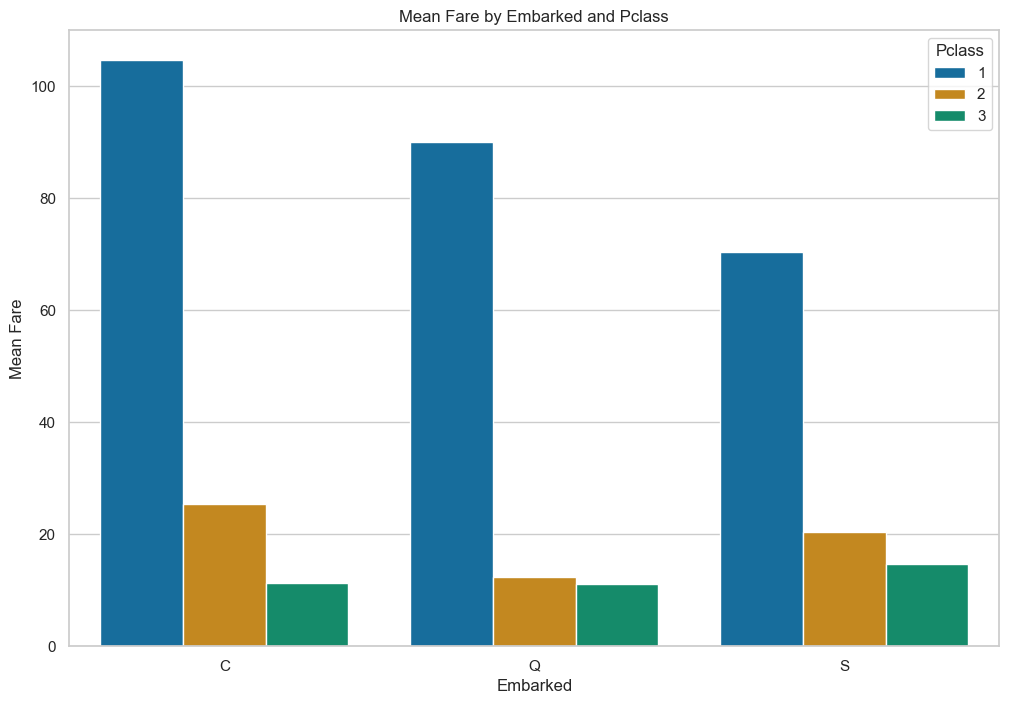

In [12]:
sns.set(style="whitegrid")
fare_by_embarked_pclass = titanic_df.groupby(['Embarked', 'Pclass'])['Fare'].mean().reset_index()
plt.figure(figsize=(12, 8))
sns.barplot(x='Embarked', y='Fare', hue='Pclass', data=fare_by_embarked_pclass, palette='colorblind')
plt.xlabel('Embarked')
plt.ylabel('Mean Fare')
plt.title('Mean Fare by Embarked and Pclass')
plt.show()

### The mean fare distribution among the embarkation points is as follows: Cherbourg > Queenstown > Southampton. 
### The mean fare distribution among the classes is also evident, with the difference between Class 1 and Class 2 being significantly higher than the difference between Class 2 and Class 3.

# PLAGIARISM POLICY

In the interest of maintaining a fair and honest academic environment, this course strictly adheres to a zero-tolerance policy regarding plagiarism. 
Accordingly, all assignments must reflect individual effort and understanding. While abstract discussions with peers about concepts are encouraged, sharing or copying specific solutions, code, or pseudocode is not permitted and will be treated as plagiarism. This policy includes work sourced from the internet, publications, and AI tools like ChatGPT and GitHub Copilot. **USE THEM RESPONSIBLY**. For example, you can utilize them to enhance understanding and support your original work, not to replace it. Submitting work that is not entirely your own creation will be regarded as a violation of academic integrity. It is vital to use all resources, including AI, in a manner that supports your educational development without compromising the principles of academic honesty. 

If in doubt, do not hesitate to seek guidance from the course staff - we are here to help, with an aim to foster a learning environment based on trust, respect, and responsibility.


# REFERENCES
[1] Kaggle. (2023). Titanic: Machine Learning from Disaster [Data set]. Kaggle Inc. https://www.kaggle.com/c/titanic/data

# ACKNOWLEDGMENTS

• The design and development of this homework have been assisted by AI tools, with a special mention to ChatGPT for its assistance in conceptualizing the assignment and refining the wording. 
